In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

### Ex. 1

In [2]:
A = np.array([[0.3, 0.6, 0.1],
              [0.5, 0.2, 0.3],
              [0.4, 0.1, 0.5]])
v = np.ones(3) / 3.0

In [4]:
dst = []
for _ in range(25):
    new_v = v * A
    dist = np.sqrt(np.square(new_v - v).sum())
    dst.append(dist)
    v = new_v

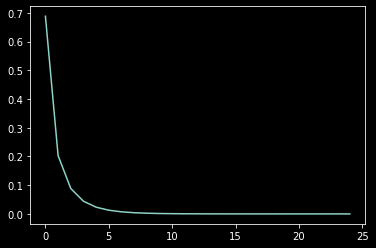

In [5]:
plt.plot(dst)
plt.show()

### Ex. 2

In [7]:
rands = np.random.rand(1000, 1000)

0.49977791251290943

In [8]:
rands = np.sum(rands, axis=1)

(1000,)

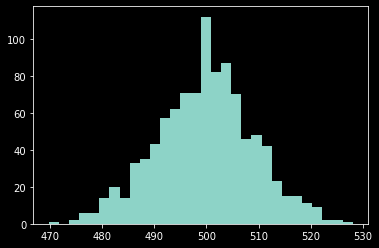

In [11]:
plt.hist(rands, bins=30)
plt.show()

### Ex. 5

In [16]:
test_arr1 = np.array([[1, 2, 3, 4],
                      [5, 6, 7, 8],
                      [9, 1, 2, 3],
                      [4, 5, 6, 7]])
test_arr2 = np.array([[1, 2, 2, 1],
                      [5, 6, 6, 5],
                      [9, 1, 1, 9],
                      [4, 5, 5, 4]])

In [19]:
def is_sym(arr: np.ndarray):
    return np.isclose(arr, np.fliplr(arr)).all()

In [20]:
print(is_sym(test_arr1))
print(is_sym(test_arr2))

False
True


### Ex. 6

In [50]:
def make_data(angle_offset: float, data_points: int) -> np.ndarray:
    t = np.linspace(0.1, 1.0, data_points)
    angs = np.random.randn(data_points)/10.0 + angle_offset
    x = np.sin(-t+angs) * t
    y = np.cos(-t+angs) * t
    return np.stack([x, y])

In [53]:
third_circle = np.pi * 2.0 / 3.0
count = 64

data1 = np.hstack(list(make_data(i * third_circle, count) for i in range(3)))
data2 = np.hstack(list(make_data(i * third_circle + third_circle / 2.0, count) for i in range(3)))
data = np.hstack([data1, data2])
marks = np.zeros(data.shape[1])
marks[data.shape[1]//2:] = 1

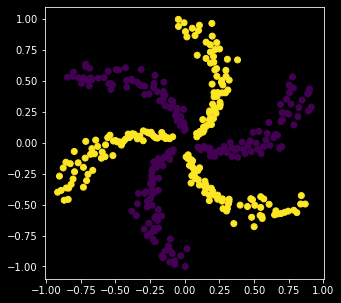

In [62]:
plt.figure(figsize=(5,5))
plt.scatter(data[0], data[1], c=marks)
plt.show()

### Ex. 9

In [55]:
import pandas as pd

In [56]:
df = pd.DataFrame()
df["x1"] = data[0]
df["x2"] = data[1]
df["y"] = marks

df.describe()

,x1,x2,y
count,384.000000,384.000000,384.000000
mean,-0.002169,0.001477,0.500000
std,0.432131,0.431706,0.500652
min,-0.916882,-0.999993,0.000000
25%,-0.257750,-0.328090,0.000000
50%,0.000662,0.003748,0.500000
75%,0.261467,0.332887,1.000000
max,0.912432,0.998925,1.000000


In [58]:
df.to_csv("data/spirals.csv", index=False)